In [ ]:
"""
import pandas as pd
import numpy as np

# Load velocity data
velocities_df = pd.read_csv("Lubigi_flows_wwf.csv")
velocities = velocities_df['U'].values  # shape: (16,)

# Load face point coordinates
face_points_df = pd.read_csv("inlet1_cells.csv")

# Automatically find min and max Y from the actual face point data
min_y = face_points_df['y'].min()
max_y = face_points_df['y'].max()
num_bins = len(velocities)

# Compute bin edges
bin_edges = np.linspace(min_y, max_y, num_bins + 1)

# Digitize Y-values into bin indices
y_coords = face_points_df['y'].values
bin_indices = np.digitize(y_coords, bin_edges) - 1
bin_indices = np.clip(bin_indices, 0, num_bins - 1)

# Assign velocities
face_points_df['Ux'] = velocities[bin_indices]
face_points_df['Uy'] = 0.0
face_points_df['Uz'] = 0.0

# Save to CSV
face_points_df.to_csv("binned_velocity_profile_1128.csv", index=False)

print(f"✅ Done! Velocity binned using Y range from {min_y:.4f} to {max_y:.4f}")


✅ Done! Velocity binned using Y range from 36.5884 to 66.3942


In [ ]:
face_points_df

,x,y,z,Ux,Uy,Uz
0,0.216348,114.045,2.23383,0.060507,0.0,0.0
1,0.214138,114.268,2.23249,0.060507,0.0,0.0
2,0.211909,114.492,2.23250,0.067619,0.0,0.0
3,0.209670,114.719,2.23250,0.067619,0.0,0.0
4,0.207431,114.944,2.23259,0.067619,0.0,0.0
...,...,...,...,...,...,...
527,0.000580,135.809,2.22599,0.021200,0.0,0.0
528,0.000496,135.818,2.33692,0.021200,0.0,0.0
529,0.001625,135.704,2.34277,0.021200,0.0,0.0
530,0.300746,105.945,2.31026,0.021200,0.0,0.0


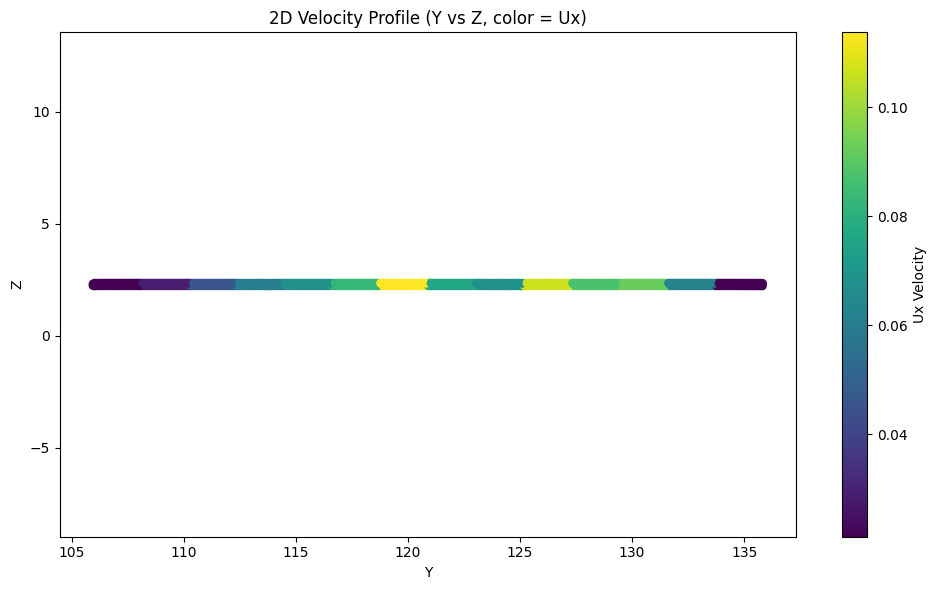

In [ ]:
"""
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("binned_velocity_profile_90.csv")

# Extract columns
Y = df['y']
Z = df['z']
Ux = df['Ux']

# Create 2D scatter plot (Y vs Z) with color coding for velocity
plt.figure(figsize=(10, 6))
sc = plt.scatter(Y, Z, c=Ux, cmap='viridis', s=30)

# Add colorbar to show velocity values
cbar = plt.colorbar(sc)
cbar.set_label('Ux Velocity')

# Axis labels
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('2D Velocity Profile (Y vs Z, color = Ux)')
plt.axis('equal')

plt.tight_layout()
plt.show()


In [ ]:
#foam ready file

In [ ]:
import pandas as pd
import numpy as np

# Load velocity data
velocities_df = pd.read_csv("Lubigi_flows_wwf.csv")
velocities = velocities_df['U'].values  # shape: (16,)

# Load face point coordinates
face_points_df = pd.read_csv("inlet1_cells.csv")

# Automatically find min and max Y from the actual face point data
min_y = face_points_df['y'].min()
max_y = face_points_df['y'].max()
num_bins = len(velocities)

# Compute bin edges
bin_edges = np.linspace(min_y, max_y, num_bins + 1)

# Digitize Y-values into bin indices
y_coords = face_points_df['y'].values
bin_indices = np.digitize(y_coords, bin_edges) - 1
bin_indices = np.clip(bin_indices, 0, num_bins - 1)

# Assign velocities
face_points_df['Ux'] = velocities[bin_indices]
face_points_df['Uy'] = 0.0
face_points_df['Uz'] = 0.0

# OpenFOAM format - internalField with List<vector>
output_data = face_points_df[['Ux', 'Uy', 'Uz']].values
num_faces = len(output_data)

# Create the foam output
foam_output = f"nonuniform List<vector>\n{num_faces}\n(\n"

# Add each velocity vector in OpenFOAM format
for velocity in output_data:
    foam_output += f"({velocity[0]} {velocity[1]} {velocity[2]})\n"

foam_output += ")"

# Save to OpenFOAM format file
with open("velocity_profile_inlet1.txt", "w") as f:
    f.write(foam_output)

print(f"✅ OpenFOAM binned velocity profile written to 'velocity_profile_inlet1.txt'")


✅ OpenFOAM binned velocity profile written to 'velocity_profile_inlet1.txt'


In [ ]:
#Nakamiro

In [ ]:
"""
import pandas as pd
import numpy as np

# Load velocity data using pandas
velocities_df = pd.read_csv("Velocity_nakamiro.csv")  # Should have a 'Velocity' column
velocities = velocities_df['Velocity'].values  # shape: (7,)

# Load face point coordinates
face_points_df = pd.read_csv("face_nakamiro.csv")  # Should have columns: 'X', 'Y', 'Z'

# Constants
face_length = 7.4
num_bins = len(velocities)

# Define unit direction of face normal (30 degrees to X-axis)
angle_deg = 30
angle_rad = np.radians(angle_deg)
normal_dir = np.array([np.cos(angle_rad), np.sin(angle_rad), 0.0])  # [cos(θ), sin(θ), 0]

# Project face points onto the face normal direction
projections = (
    face_points_df[['X', 'Y', 'Z']].values @ normal_dir
)
face_points_df['projection'] = projections

# Bin projected distances
bin_edges = np.linspace(0, face_length, num_bins + 1)
bin_indices = np.digitize(projections, bin_edges) - 1
bin_indices = np.clip(bin_indices, 0, num_bins - 1)

# Assign velocity in normal direction for each bin
face_points_df['Ux'] = velocities[bin_indices] * normal_dir[0]
face_points_df['Uy'] = velocities[bin_indices] * normal_dir[1]
face_points_df['Uz'] = 0.0  # since normal_dir[2] = 0

# Optional: drop projection column if you want
face_points_df.drop(columns=['projection'], inplace=True)

# Save to CSV
face_points_df.to_csv("binned_velocity_profile_face2.csv", index=False)

print("✅ Velocity profile written with full pandas workflow.")
"""

'\nimport pandas as pd\nimport numpy as np\n\n# Load velocity data using pandas\nvelocities_df = pd.read_csv("Velocity_nakamiro.csv")  # Should have a \'Velocity\' column\nvelocities = velocities_df[\'Velocity\'].values  # shape: (7,)\n\n# Load face point coordinates\nface_points_df = pd.read_csv("face_nakamiro.csv")  # Should have columns: \'X\', \'Y\', \'Z\'\n\n# Constants\nface_length = 7.4\nnum_bins = len(velocities)\n\n# Define unit direction of face normal (30 degrees to X-axis)\nangle_deg = 30\nangle_rad = np.radians(angle_deg)\nnormal_dir = np.array([np.cos(angle_rad), np.sin(angle_rad), 0.0])  # [cos(θ), sin(θ), 0]\n\n# Project face points onto the face normal direction\nprojections = (\n    face_points_df[[\'X\', \'Y\', \'Z\']].values @ normal_dir\n)\nface_points_df[\'projection\'] = projections\n\n# Bin projected distances\nbin_edges = np.linspace(0, face_length, num_bins + 1)\nbin_indices = np.digitize(projections, bin_edges) - 1\nbin_indices = np.clip(bin_indices, 0, num_b

In [ ]:
'''
#revised Nakamiro
import pandas as pd
import numpy as np

# Load velocity data
velocities_df = pd.read_csv("Nakamiro_flows.csv")  # Column: 'Velocity'
velocities = velocities_df['U'].values  # shape: (7,)

# Load face points
face_points_df = pd.read_csv("inlet2_45.csv")  # Columns: 'X', 'Y', 'Z'

# Constants
face_length = 7.4
num_bins = len(velocities)

# Define unit direction vector for -30 degrees slope
angle_deg = -30  # Negative slope
angle_rad = np.radians(angle_deg)
normal_dir = np.array([np.cos(angle_rad), np.sin(angle_rad), 0.0])

# Use base corner of face for relative projections
x_min = face_points_df['X'].min()
y_max = face_points_df['Y'].max()
origin = np.array([x_min, y_max, 0.0])  # top-left corner for downward slope

# Project points relative to face origin
relative_positions = face_points_df[['X', 'Y', 'Z']].values - origin
projections = relative_positions @ normal_dir
face_points_df['projection'] = projections

# Bin projected distances
bin_edges = np.linspace(0, face_length, num_bins + 1)
bin_indices = np.digitize(projections, bin_edges) - 1
bin_indices = np.clip(bin_indices, 0, num_bins - 1)

# Assign velocity components
face_points_df['Ux'] = velocities[bin_indices] * normal_dir[0]
face_points_df['Uy'] = velocities[bin_indices] * normal_dir[1]
face_points_df['Uz'] = 0.0

# Clean up
face_points_df.drop(columns=['projection'], inplace=True)
face_points_df.to_csv("binned_velocity_profile_face2.csv", index=False)

print("✅ Velocity profile written, accounting for slope and offset.")
'''

✅ Velocity profile written, accounting for slope and offset.


# Working code for Nakamiro

In [ ]:

import pandas as pd
import numpy as np

# 1. Load your data
vel_df = pd.read_csv("Nakamiro_flows_wwf.csv")       # must have column "Velocity" with 7 values
faces_df = pd.read_csv("inlet2_cells.csv")         # must have columns "X", "Y", "Z"

# 2. Parameters
face_length = 7.2
velocities = vel_df["U"].values              # shape: (7,)
num_bins   = len(velocities)

# 3. Direction vectors


# — flow (tube) axis
ang_flow = 73
ndir     = np.array([np.cos(np.radians(ang_flow)),
                     np.sin(np.radians(ang_flow)),
                     0.0])

# — variation along inlet face  90+angle_flow
ang_var = ang_flow + 90
vdir    = np.array([np.cos(np.radians(ang_var)),
                    np.sin(np.radians(ang_var)),
                    0.0])

# 4. Project each face point onto the variation axis
coords    = faces_df[["x","y","z"]].values
raw_proj  = coords @ vdir
proj_rel  = raw_proj - raw_proj.min()               # offset so min = 0
faces_df["proj_rel"] = proj_rel

# 5. Bin the projections into 7 bins over [0, face_length]
edges     = np.linspace(0, face_length, num_bins + 1)
bin_idx   = np.digitize(proj_rel, edges) - 1
bin_idx   = np.clip(bin_idx, 0, num_bins-1)
faces_df["bin"] = bin_idx

# 6. Assign the corresponding velocity magnitude to each point
faces_df["mag"] = velocities[bin_idx]

# 7. Compute the velocity vector along the tube axis
faces_df["Ux"] = faces_df["mag"] * ndir[0]
faces_df["Uy"] = faces_df["mag"] * ndir[1]
faces_df["Uz"] = 0.0

# 8. Save a “binned” CSV for inspection
faces_df.drop(columns=["proj_rel","bin","mag"]).to_csv(
    "binned_velocity_profile_face.csv", index=False
)

# 9. Write the OpenFOAM patch file (nonuniform List<vector>)
with open("velocity_profile_inlet2.txt", "w") as f:
    f.write("nonuniform List<vector>\n")
    f.write(f"{len(faces_df)}\n")
    f.write("(\n")
    for u, v, w in zip(faces_df["Ux"], faces_df["Uy"], faces_df["Uz"]):
        f.write(f"({u:.8f} {v:.8f} {w:.8f})\n")
    f.write(")\n")

print("✅ Done! • CSV → binned_velocity_profile_face.csv\n"
      "      • OpenFOAM list → velocity_profile_inlet2.txt")


✅ Done! • CSV → binned_velocity_profile_face.csv
      • OpenFOAM list → velocity_profile_inlet2.txt


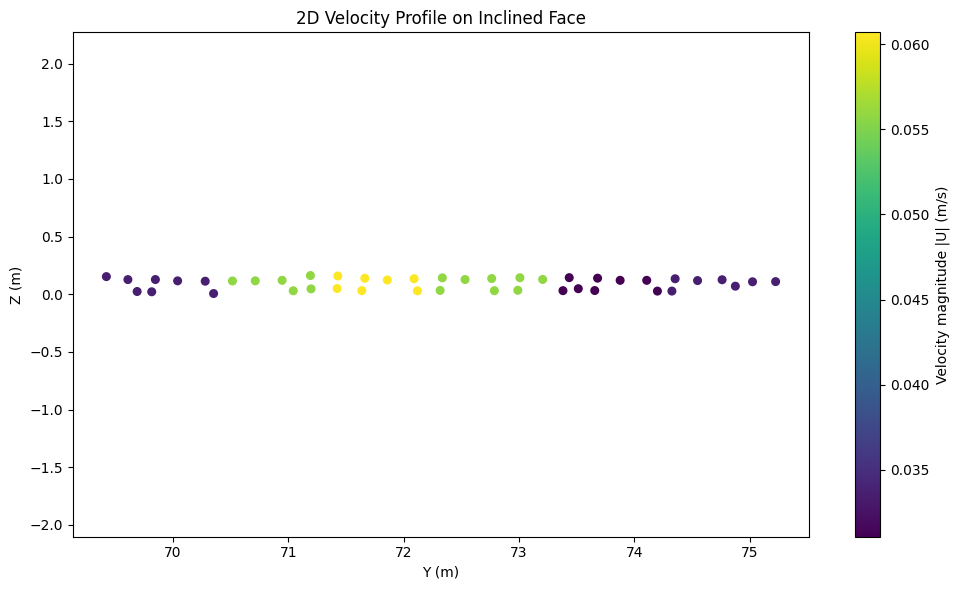

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load your per‑point velocity CSV
df = pd.read_csv("binned_velocity_profile_face4512.csv")

# 2. Compute the actual velocity magnitude at each point
df['mag'] = np.sqrt(df['Ux']**2 + df['Uy']**2 + df['Uz']**2)

# 3. Make the scatter plot (Y vs Z, colored by |U|)
plt.figure(figsize=(10, 6))
sc = plt.scatter(df['x'], df['z'], c=df['mag'], cmap='viridis', s=30)

# 4. Add a colorbar and labels
cbar = plt.colorbar(sc)
cbar.set_label('Velocity magnitude |U| (m/s)')

plt.xlabel('Y (m)')
plt.ylabel('Z (m)')
plt.title('2D Velocity Profile on Inclined Face')
plt.axis('equal')
plt.tight_layout()
plt.show()


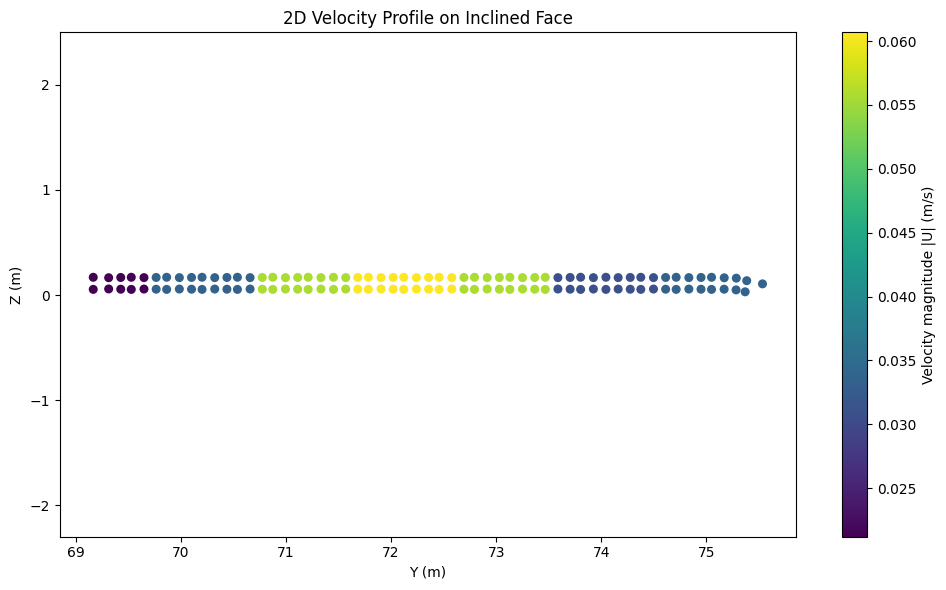

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load your per‑point velocity CSV
df = pd.read_csv("binned_velocity_profile_face73.csv")

# 2. Compute the actual velocity magnitude at each point
df['mag'] = np.sqrt(df['Ux']**2 + df['Uy']**2 + df['Uz']**2)

# 3. Make the scatter plot (Y vs Z, colored by |U|)
plt.figure(figsize=(10, 6))
sc = plt.scatter(df['x'], df['z'], c=df['mag'], cmap='viridis', s=30)

# 4. Add a colorbar and labels
cbar = plt.colorbar(sc)
cbar.set_label('Velocity magnitude |U| (m/s)')

plt.xlabel('Y (m)')
plt.ylabel('Z (m)')
plt.title('2D Velocity Profile on Inclined Face')
plt.axis('equal')
plt.tight_layout()
plt.show()


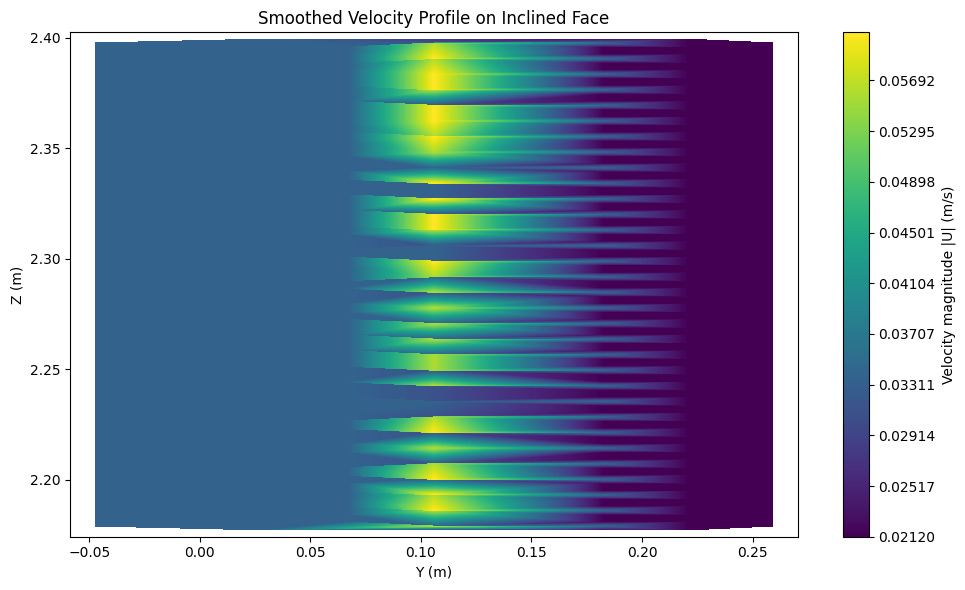

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri

# Load your per‑point binned CSV
df = pd.read_csv("binned_velocity_profile_face2.csv")

# Compute speed at each point
df['mag'] = np.sqrt(df['Ux']**2 + df['Uy']**2 + df['Uz']**2)

# Extract Y, Z, and magnitude arrays
Y = df['Y'].values
Z = df['Z'].values
M = df['mag'].values

# 1) Create a triangulation of your (Y,Z) scattered points
triang = mtri.Triangulation(Y, Z)

# 2) Plot filled contours over that triangulation
plt.figure(figsize=(10,6))
# choose a lot of levels for smoothness
levels = np.linspace(M.min(), M.max(), 200)

contour = plt.tricontourf(triang, M, levels=levels, cmap='viridis')
plt.colorbar(contour, label='Velocity magnitude |U| (m/s)')

plt.xlabel('Y (m)')
plt.ylabel('Z (m)')
plt.title('Smoothed Velocity Profile on Inclined Face')
plt.axis('equal')
plt.tight_layout()
plt.show()


In [ ]:
from scipy.interpolate import Rbf

# Create RBF interpolation function
rbf = Rbf(Y, Z, M, function='multiquadric')

# Create a regular grid for evaluation
y_grid, z_grid = np.mgrid[Y.min():Y.max():100j, Z.min():Z.max():100j]
m_grid = rbf(y_grid, z_grid)

plt.figure(figsize=(10, 6))
plt.contourf(y_grid, z_grid, m_grid, levels=200, cmap='viridis')

ValueError: All arrays must be equal length.

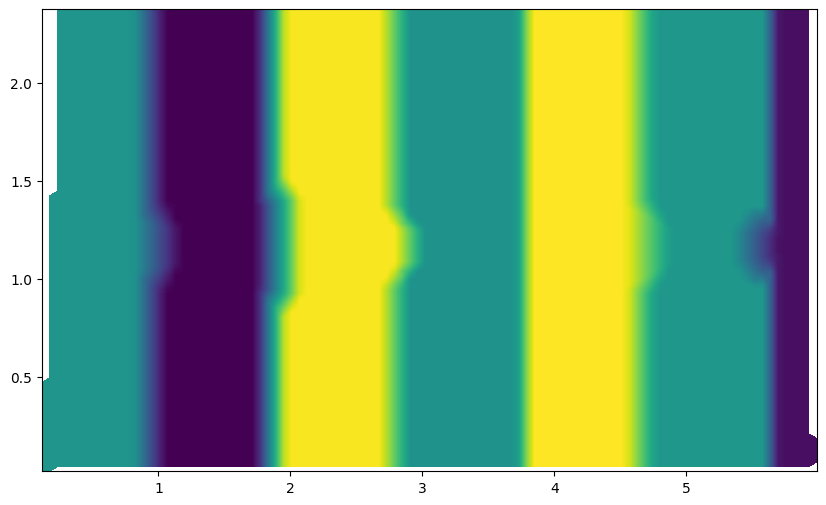

In [ ]:
from scipy.spatial import Delaunay
from matplotlib.tri import LinearTriInterpolator

# Create the Delaunay triangulation
points = np.column_stack((Y, Z))
tri = Delaunay(points)

# Create a matplotlib triangulation object
triang = mtri.Triangulation(Y, Z, triangles=tri.simplices)

# Create a linear interpolator
interp = LinearTriInterpolator(triang, M)

# Create a grid for evaluation
y_grid, z_grid = np.mgrid[Y.min():Y.max():100j, Z.min():Z.max():100j]
m_grid = interp(y_grid, z_grid)

plt.figure(figsize=(10, 6))
plt.contourf(y_grid, z_grid, m_grid, levels=200, cmap='viridis')